In [52]:
import pandas as pd
import numpy as np

In [53]:
data= pd.read_csv('placement.csv')
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# 1. Preprocess, EDA, Data Selection

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [55]:
data =data.iloc[:,1:]

In [56]:
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [57]:
import matplotlib.pyplot as plt

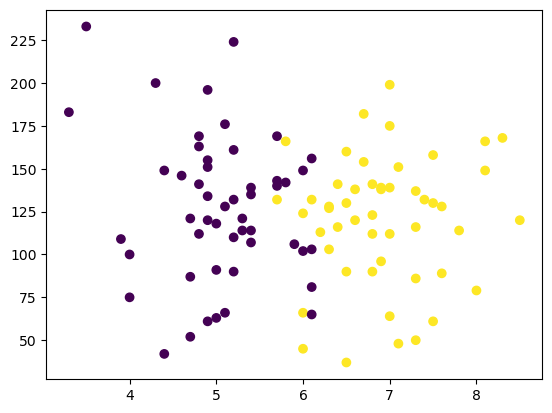

In [58]:
#eda
plt.scatter(data['cgpa'], data['iq'], c=data['placement'])

In [59]:
#logistic regression classifies data. it cuts data to seperate the classes
#dont need feature selection here

In [60]:
x= data.iloc[:,0:2]
y=data.iloc[:,-1]

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


### SCALE THE DATASET

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [74]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


Model Selection

In [75]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [76]:
y_pred=clf.predict(x_test)

### EVALUATE THE MODEL/ MODEL SELECTION

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [80]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 908.9 kB/s eta 0:00:0000:0100:01


<Axes: >

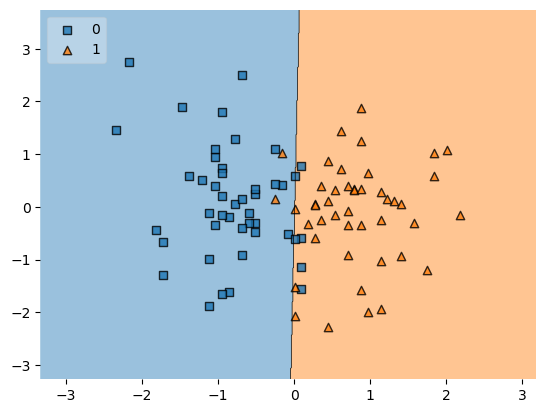

In [82]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)